# Export Data

In [32]:
%load_ext autoreload
%autoreload 2
from dimension_reduction import *
import numpy as np
import json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
# # takes about 1.5m to run this
# root_folder = 'asset/MET'
# images_array = load_images_from_folders(root_folder)
# flattened_color = np.array([image.flatten() for image in images_array])

root_folder = 'upload_image'
images_array = load_images(root_folder)
flattened_color = np.array([image.flatten() for image in images_array])
images_array.shape

(310, 128, 128, 3)

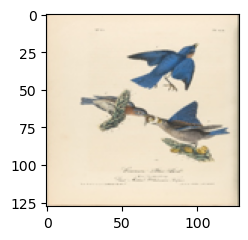

In [34]:
example_image = images_array[0]
plt.figure(figsize=(2.5, 2.5))
plt.imshow(example_image.reshape((128, 128, 3)))
plt.show()

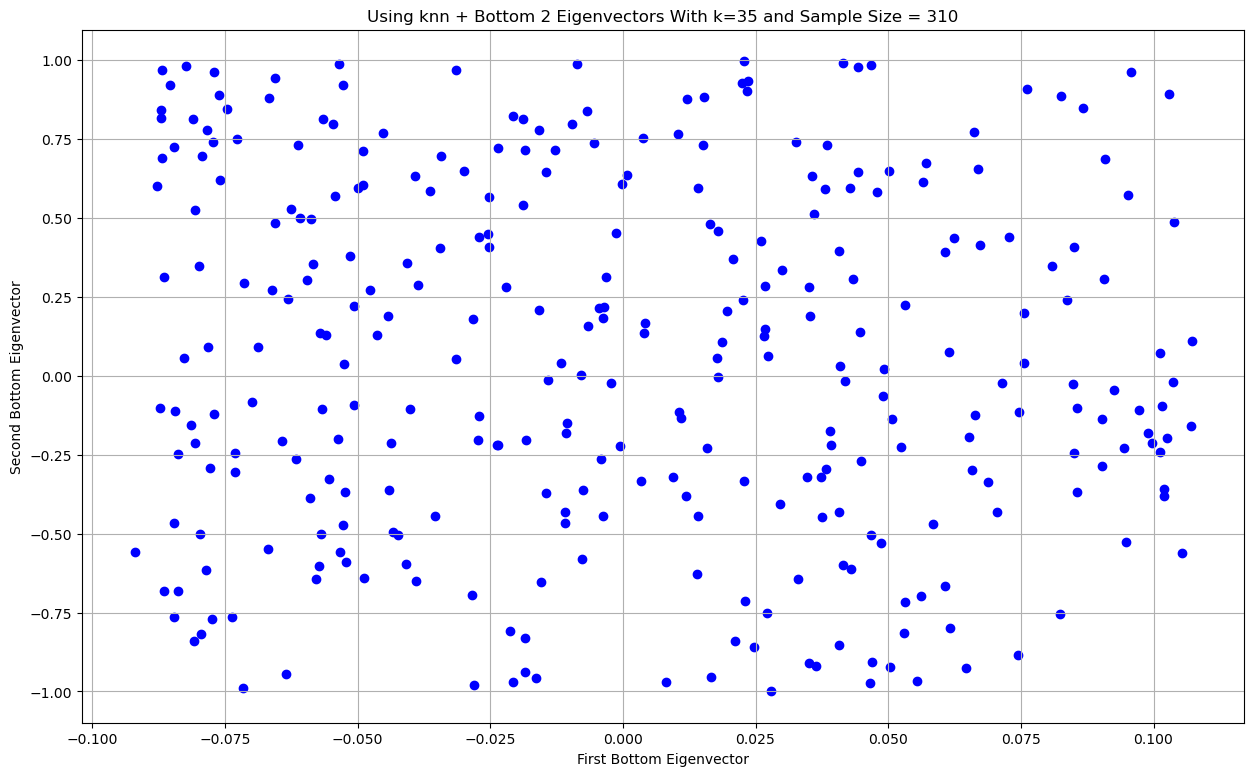

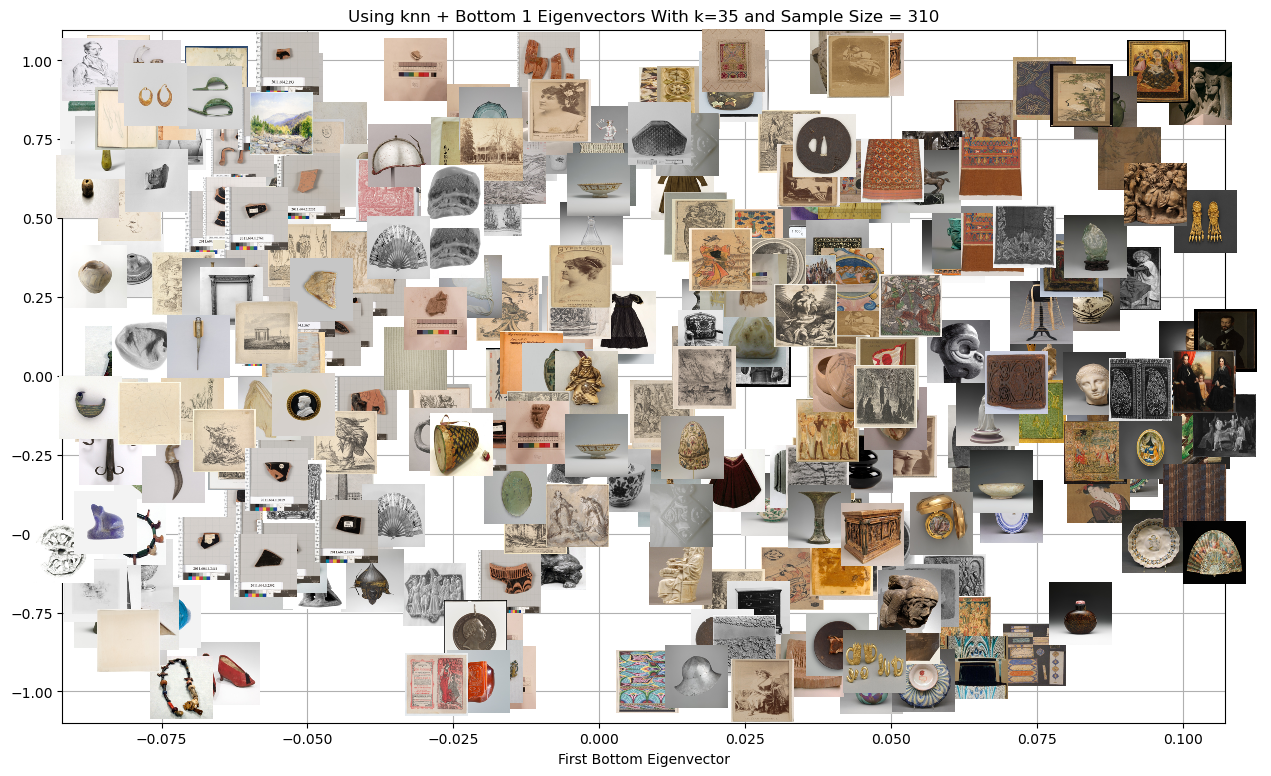

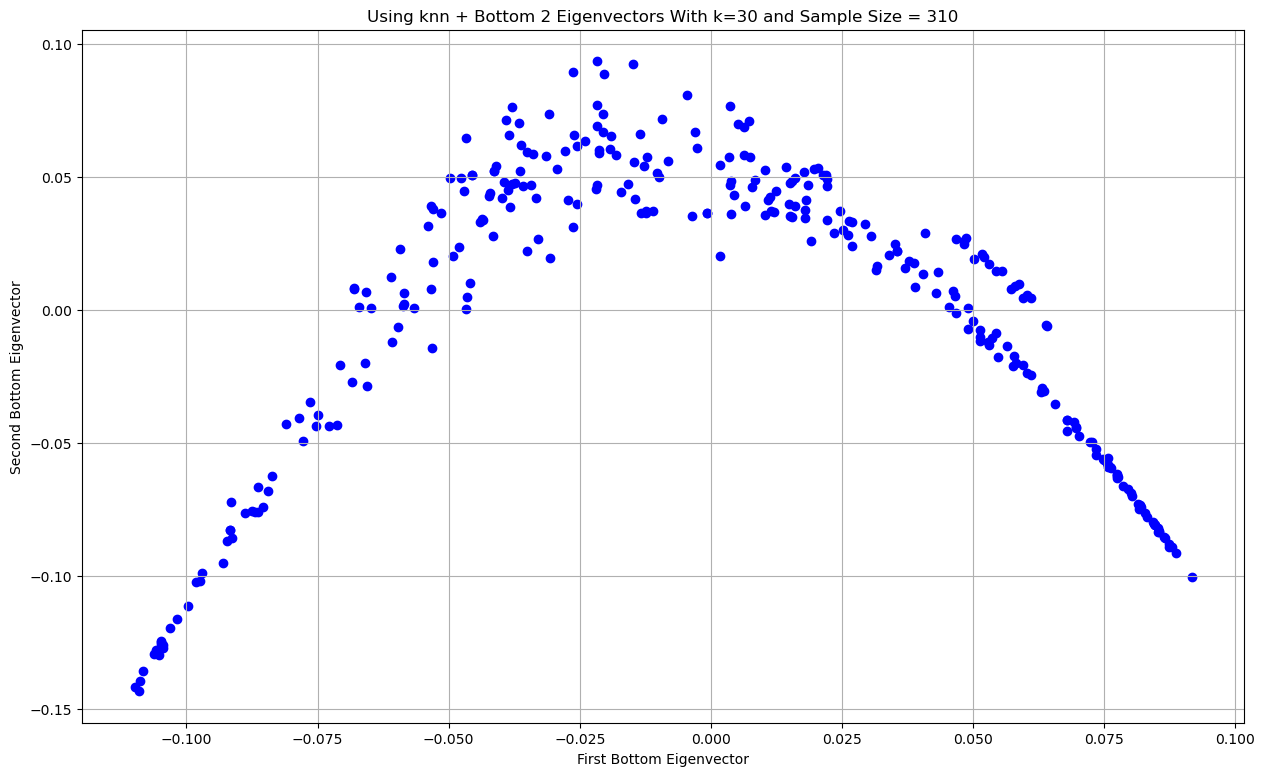

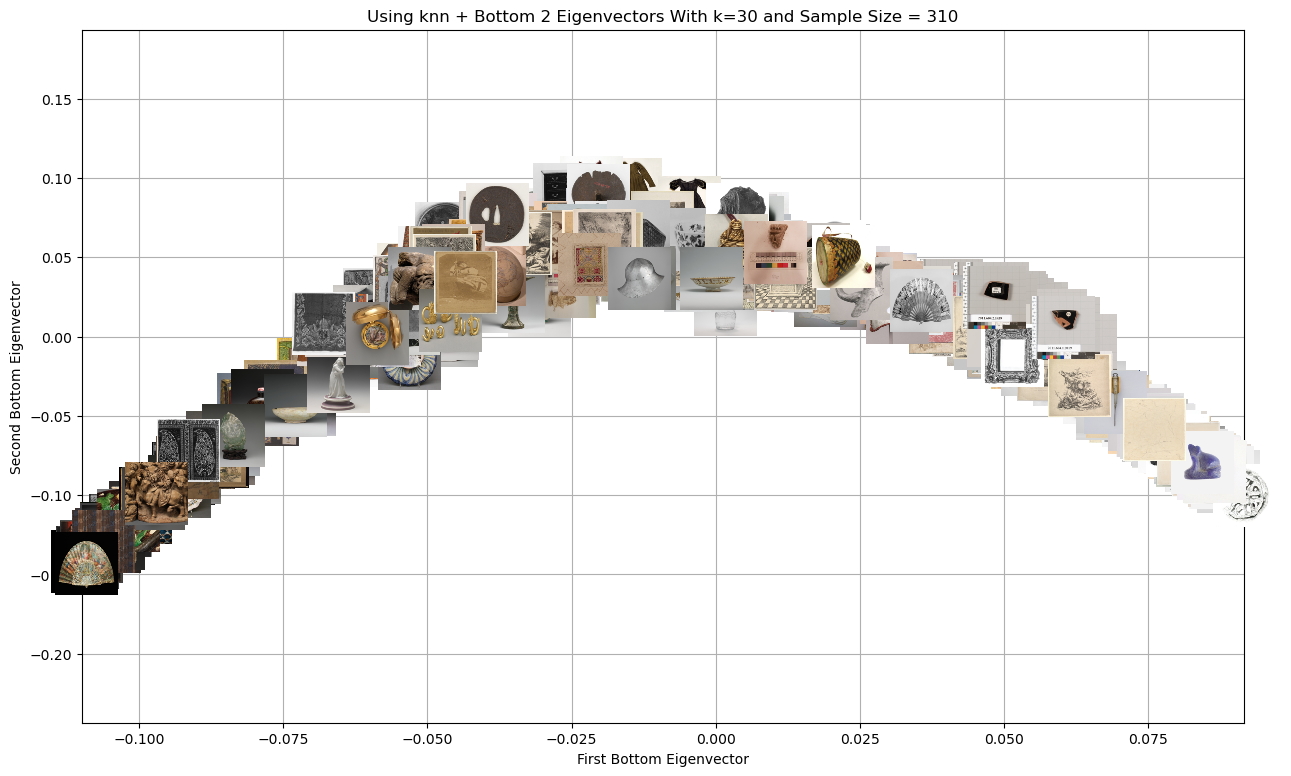

In [35]:
# np.random.seed(123)
# rngs = np.random.choice(30000, 300, replace=False)
# sample = np.array([flattened_color[rng] for rng in rngs])
sample = flattened_color

knn_sol_1e, knn_W_1e = laplacian_eigenmap(sample, k=35, image_dim=128, radial_func='knn', one_dim=True, num_eigen=0)
knn_sol_2e, knn_W_2e = laplacian_eigenmap(sample, k=30, image_dim=128, radial_func='knn')

#gau_sol_1e, gau_W_1e = laplacian_eigenmap(sample, k=25, image_dim=128, radial_func='kd_kernel_gaussian', one_dim=True, num_eigen=0)
#gau_sol_2e, gau_W_2e = laplacian_eigenmap(sample, k=25, image_dim=128, radial_func='kd_kernel_gaussian')

In [37]:
with open('asset/small_image_data.json', 'r') as file:
    data = json.load(file)

In [38]:
data['nodes_info']

[{'id': '21983',
  'path': 'MET/21983/4.jpg',
  'org_pos_x': 0.543,
  'org_pos_y': 0.01,
  'knn_2e_x': 0.03952987761748542,
  'knn_2e_y': -0.02077533828975443,
  'knn_1e_x': -0.04163098063499688},
 {'id': '451782',
  'path': 'MET/451782/1.jpg',
  'org_pos_x': 0.278,
  'org_pos_y': 0.79,
  'knn_2e_x': 0.02005721023099441,
  'knn_2e_y': -0.04045544163925934,
  'knn_1e_x': -0.019391561812410224},
 {'id': '452107',
  'path': 'MET/452107/0.jpg',
  'org_pos_x': 0.425,
  'org_pos_y': 0.275,
  'knn_2e_x': 0.05899133432330947,
  'knn_2e_y': 0.010810962224282877,
  'knn_1e_x': -0.057749771599712396},
 {'id': '445520',
  'path': 'MET/445520/0.jpg',
  'org_pos_x': 0.845,
  'org_pos_y': 0.718,
  'knn_2e_x': 0.046483723247684516,
  'knn_2e_y': -0.01739949784982886,
  'knn_1e_x': -0.04614731599464372},
 {'id': '569492',
  'path': 'MET/569492/0.jpg',
  'org_pos_x': 0.005,
  'org_pos_y': 0.421,
  'knn_2e_x': -0.06659565605926458,
  'knn_2e_y': 0.052930143916269046,
  'knn_1e_x': 0.0669912991119051},
 {

In [39]:
nodes_info = data['nodes_info']

for idx, node in enumerate(nodes_info):
    node['knn_2e_x'] = knn_sol_2e[idx][0]
    node['knn_2e_y'] = knn_sol_2e[idx][1]
    node['knn_1e_x'] = knn_sol_1e[idx]

In [40]:
with open('small_image_data', 'w') as json_file:
    json.dump(data, json_file)

In [41]:
def convert_json(sol, name):
    array_list = sol.tolist()
    json_data = json.dumps(array_list)
    print(json_data)

    with open(f'export/{name}.json', 'w') as f:
        json.dump(array_list, f)

In [42]:
convert_json(knn_sol_1e, 'knn1e')
# convert_json(gau_sol_1e, 'gau1e')
convert_json(knn_sol_2e, 'knn2e')
# convert_json(gau_sol_2e, 'gau2e')

[-0.08238229602691623, -0.07997795022193205, -0.038631280304587456, -0.07308956423373786, 0.07563577863436605, 0.04783518048279324, 0.05029213163605775, 0.01782610279480193, -0.06356441476330604, 0.07457229584859615, -0.008709948308205484, 0.009516642213699078, -0.029850488312541362, -0.02838206533302419, 0.023657304616779562, 0.003961508284069375, 0.1019763625313699, 0.06078335995180239, 0.06165157065390914, 0.014208085081592771, 0.07450591592712306, -0.05905186542164072, -0.05587883052120702, 0.035993343120643624, -0.02534252607665907, -0.07163004001002095, 0.012136928595902288, -0.0736233042381753, -0.05280004353132424, -0.01847171007929906, -0.007746408369465765, -0.05845597178039149, -0.04418392315369507, -0.07783645319259325, -0.0401511752677388, 0.02339449551685481, 0.01953289929997383, 0.027420012970921448, -0.07932594729262357, 0.06069786465517379, -0.08274301179624073, 0.10167015702344652, -0.08683725333468448, -0.06679473679683423, -0.056916781353195535, 0.06575009021075286,

In [43]:
def adjacency_to_d3_json(adjacency_matrix, name):
    """
    Converts an adjacency matrix to a JSON file format for use with D3.js.

    Args:
    adjacency_matrix (numpy.ndarray): A square adjacency matrix.
    output_filename (str): The file to which to write the JSON output.
    """
    num_nodes = adjacency_matrix.shape[0]
    nodes = [{'id': str(i), 'group': 1} for i in range(num_nodes)]
    links = []

    for i in range(num_nodes):
        for j in range(num_nodes):
            if adjacency_matrix[i, j] != 0:  # assuming 0 means no edge
                links.append({'source': str(i), 'target': str(j), 'value': adjacency_matrix[i, j]})

    graph = {'nodes': nodes, 'links': links}

    with open(f'export/{name}.json', 'w') as f:
        json.dump(graph, f, indent=4)

    return graph

In [44]:
knn_W_1e

array([[1., 1., 0., ..., 0., 0., 1.],
       [1., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 0., 0., 1.]])

In [45]:
adjacency_to_d3_json(knn_W_1e, 'knnW1e')
# adjacency_to_d3_json(gau_W_1e, 'gauW1e')
adjacency_to_d3_json(knn_W_2e, 'knnW2e')
# adjacency_to_d3_json(gau_W_2e, 'gauW2e')

{'nodes': [{'id': '0', 'group': 1},
  {'id': '1', 'group': 1},
  {'id': '2', 'group': 1},
  {'id': '3', 'group': 1},
  {'id': '4', 'group': 1},
  {'id': '5', 'group': 1},
  {'id': '6', 'group': 1},
  {'id': '7', 'group': 1},
  {'id': '8', 'group': 1},
  {'id': '9', 'group': 1},
  {'id': '10', 'group': 1},
  {'id': '11', 'group': 1},
  {'id': '12', 'group': 1},
  {'id': '13', 'group': 1},
  {'id': '14', 'group': 1},
  {'id': '15', 'group': 1},
  {'id': '16', 'group': 1},
  {'id': '17', 'group': 1},
  {'id': '18', 'group': 1},
  {'id': '19', 'group': 1},
  {'id': '20', 'group': 1},
  {'id': '21', 'group': 1},
  {'id': '22', 'group': 1},
  {'id': '23', 'group': 1},
  {'id': '24', 'group': 1},
  {'id': '25', 'group': 1},
  {'id': '26', 'group': 1},
  {'id': '27', 'group': 1},
  {'id': '28', 'group': 1},
  {'id': '29', 'group': 1},
  {'id': '30', 'group': 1},
  {'id': '31', 'group': 1},
  {'id': '32', 'group': 1},
  {'id': '33', 'group': 1},
  {'id': '34', 'group': 1},
  {'id': '35', 'group

# Change reference links

In [49]:
# Path to your JSON file
json_file_path = 'asset/small_image_data.json'

# New directory where the paths should be updated to
new_directory_path = 'https://raw.githubusercontent.com/KevinBian107/laplacian_eigenmap_vis/master/upload_image/'

# Read the JSON file
with open(json_file_path, 'w') as file:  # or 'path/to/new_file_name.json' to create a new file
    json.dump(data, file, indent=4)

# Loop over each image in the nodes_info list, enumerate provides the index
for index, image in enumerate(data['nodes_info']):
    # Get the original image path from the JSON
    original_path = image['path']
    # Define the new path for the image in the new folder with the index as part of the file name
    new_image_path = os.path.join(new_directory_path, f"{index}_{os.path.basename(original_path)}")
    print(new_image_path)
    # Update the path in the JSON data
    image['path'] = new_image_path

https://raw.githubusercontent.com/KevinBian107/laplacian_eigenmap_vis/master/upload_image/0_0_4.jpg
https://raw.githubusercontent.com/KevinBian107/laplacian_eigenmap_vis/master/upload_image/1_1_1.jpg
https://raw.githubusercontent.com/KevinBian107/laplacian_eigenmap_vis/master/upload_image/2_2_0.jpg
https://raw.githubusercontent.com/KevinBian107/laplacian_eigenmap_vis/master/upload_image/3_3_0.jpg
https://raw.githubusercontent.com/KevinBian107/laplacian_eigenmap_vis/master/upload_image/4_4_0.jpg
https://raw.githubusercontent.com/KevinBian107/laplacian_eigenmap_vis/master/upload_image/5_5_0.jpg
https://raw.githubusercontent.com/KevinBian107/laplacian_eigenmap_vis/master/upload_image/6_6_2.jpg
https://raw.githubusercontent.com/KevinBian107/laplacian_eigenmap_vis/master/upload_image/7_7_5.jpg
https://raw.githubusercontent.com/KevinBian107/laplacian_eigenmap_vis/master/upload_image/8_8_1.jpg
https://raw.githubusercontent.com/KevinBian107/laplacian_eigenmap_vis/master/upload_image/9_9_0.jpg


In [50]:
data['nodes_info']

[{'id': '21983',
  'path': 'https://raw.githubusercontent.com/KevinBian107/laplacian_eigenmap_vis/master/upload_image/0_0_4.jpg',
  'org_pos_x': 0.543,
  'org_pos_y': 0.01,
  'knn_2e_x': 0.08027884262927597,
  'knn_2e_y': -0.0701603729907324,
  'knn_1e_x': -0.08238229602691623},
 {'id': '451782',
  'path': 'https://raw.githubusercontent.com/KevinBian107/laplacian_eigenmap_vis/master/upload_image/1_1_1.jpg',
  'org_pos_x': 0.278,
  'org_pos_y': 0.79,
  'knn_2e_x': 0.0776917237535561,
  'knn_2e_y': -0.06285852323196309,
  'knn_1e_x': -0.07997795022193205},
 {'id': '452107',
  'path': 'https://raw.githubusercontent.com/KevinBian107/laplacian_eigenmap_vis/master/upload_image/2_2_0.jpg',
  'org_pos_x': 0.425,
  'org_pos_y': 0.275,
  'knn_2e_x': 0.038631813373601276,
  'knn_2e_y': 0.017511930184793578,
  'knn_1e_x': -0.038631280304587456},
 {'id': '445520',
  'path': 'https://raw.githubusercontent.com/KevinBian107/laplacian_eigenmap_vis/master/upload_image/3_3_0.jpg',
  'org_pos_x': 0.845,
 

In [51]:
data.keys()

dict_keys(['nodes', 'nodes_info', 'link_15'])